In [86]:
import pandas as pd
import numpy as np

# Cargar los datos y visualizar sus características

In [87]:
data=pd.read_csv('/Users/mar/bt-ironhack-agosto-2022-ml-competition/salaries_data.csv')

In [88]:
data_test=pd.read_csv('/Users/mar/bt-ironhack-agosto-2022-ml-competition/test.csv')

In [89]:
data_concat=pd.concat([data, data_test])

In [90]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       500 non-null    float64
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    int64  
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 47.4+ KB


In [91]:
data_concat.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,RO,0,US,L


In [92]:
data_concat.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PT      4
AT      4
PL      4
NL      4
PK      3
DK      3
AU      3
BR      3
AE      3
TR      3
LU      3
MX      3
CH      2
IT      2
CZ      2
RU      2
BE      2
SI      2
NG      2
CN      2
MT      1
HN      1
IL      1
RO      1
SG      1
CO      1
IQ      1
HR      1
NZ      1
HU      1
IR      1
DZ      1
EE      1
UA      1
CL      1
KE      1
VN      1
IE      1
AS      1
MD      1
MY      1
Name: company_location, dtype: int64

# Visualizar la correlación de las columnas numéricas

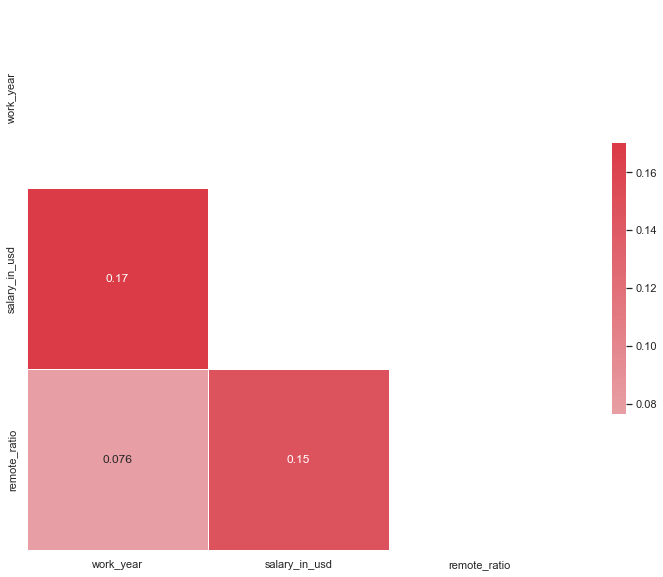

In [93]:
import pylab as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data_concat.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data_concat.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Concatenar ambas dataframe y realizar los cambios necesarios

In [ ]:
#Voy a hacer dummies del employment_type experience_level

In [94]:
X=pd.get_dummies(data_concat,columns=['employment_type','experience_level'],drop_first=True)   # drop_first=True, por defecto es False 

X.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,2022,Data Engineer,140250.0,US,100,US,M,0,1,0,0,0,1
1,2022,Data Engineer,135000.0,US,100,US,M,0,1,0,0,0,1
2,2021,BI Data Analyst,100000.0,US,100,US,M,0,1,0,0,1,0
3,2021,ML Engineer,270000.0,US,100,US,L,0,0,0,0,1,0
4,2021,Data Engineer,26005.0,RO,0,US,L,0,1,0,0,1,0


In [95]:
x=X.select_dtypes(exclude='object')

In [21]:
x

,work_year,salary_in_usd,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,2022,140250.0,100,0,1,0,0,0,1
1,2022,135000.0,100,0,1,0,0,0,1
2,2021,100000.0,100,0,1,0,0,1,0
3,2021,270000.0,100,0,0,0,0,1,0
4,2021,26005.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
102,2022,NaN,100,0,1,0,0,0,1
103,2022,NaN,100,0,1,0,0,0,1
104,2022,NaN,100,0,1,0,0,0,1
105,2022,NaN,0,0,1,0,0,0,0


# Separar de nuevo las tablas en train y test

In [100]:
x.reset_index(drop=True,inplace=True)
data_train=x.loc[0:499]

In [101]:
data_test=x.loc[500:].drop(['salary_in_usd'],axis=1)


In [98]:
data_train


,work_year,salary_in_usd,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,2022,140250.0,100,0,1,0,0,0,1
1,2022,135000.0,100,0,1,0,0,0,1
2,2021,100000.0,100,0,1,0,0,1,0
3,2021,270000.0,100,0,0,0,0,1,0
4,2021,26005.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
495,2022,100000.0,100,0,1,0,0,0,1
496,2021,5882.0,0,0,1,0,0,0,0
497,2022,90700.0,100,0,1,0,0,0,1
498,2021,82528.0,100,0,1,0,0,1,0


# Separar x,y para entrenar el modelo con la tabla de train

In [102]:
X=data_train.drop(['salary_in_usd'],axis=1)
y=data_train['salary_in_usd']

In [104]:
y

0      140250.0
1      135000.0
2      100000.0
3      270000.0
4       26005.0
         ...   
495    100000.0
496      5882.0
497     90700.0
498     82528.0
499     70000.0
Name: salary_in_usd, Length: 500, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split as tts # el alias es cosa mia

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

# Importar el modelo Linear regression, entrenarlo y predecir con train. Visualizar el error respecto a la y de train.

In [106]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred=linreg.predict(X_test)
y_pred.max()

194546.25748676946

In [108]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio
y_pred=linreg.predict(X_test)

mse(y_test, y_pred, squared=False)

46729.93794732341

In [109]:
y_pred

array([ 98421.04737446, 126634.42184566, 143569.82478466,  98421.04737446,
       143569.82478466, 124538.82365865, 100516.64556148, 100516.64556148,
        53338.90635486,  83581.24262248, 143569.82478466,  98421.04737446,
       100516.64556148, 133006.52512815, 143569.82478466,  98421.04737446,
        68178.71110685,  81485.64443546, 100516.64556148, 141474.22659765,
       143569.82478466,  70274.30929386,  83581.24262248,  70274.30929386,
       100516.64556148, 143569.82478466, 141474.22659765, 139378.62841063,
       143569.82478466, 143569.82478466, 122443.22547163, 143569.82478466,
       141474.22659765, 191958.60442576, 100516.64556148,  83581.24262248,
       143569.82478466, 100516.64556148, 143569.82478466, 143569.82478466,
       126634.42184566,  98421.04737446, 126634.42184566, 126634.42184566,
       143569.82478466,  83581.24262248, 143569.82478466,  83581.24262248,
        70274.30929386,  89953.34590496, 143569.82478466,  89953.34590496,
        68178.71110685, 1

# Con el modelo ya entrenado, hacer la predicción que sería la solución en base a la tabla de test.

In [111]:
y_pred2=linreg.predict(data_test)

In [112]:
len(y_pred2)

107

## Crear la tabla que será la solución. Exportarlo a .csv y subirlo a Kaggle

In [113]:
sol=pd.DataFrame()

sol['id']=[i for i in range(len(y_pred2))]

sol['salary_in_usd']=y_pred2

In [114]:
sol.to_csv('solucionMar.csv',index=False)